In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../../DataSets/West_Africa_And_India_Dams_2018/wb_database_dams.csv', encoding = 'ISO-8859-1')
metadata = pd.read_excel('../../DataSets/West_Africa_And_India_Dams_2018/metadata.xlsx')

In [3]:
data.head()

,Country,ISO,Sec_cntry,Name,Purpose,Admin_unit,Near_city,River,Main_basin,Sub_basin,...,OtherFiscal _incentives_RE,Prioritized_access_grid_RE,Priority_dispatch,Compensation_IPP_offtake,Compensations_lost_generation,Gov_guarantee_payments,Regulatory_Overview,Download,Long,Lat
0,Guinea,GIN,NaN,Garafiri,Hydropower,National,NaN,KonkourÃ©,KonkourÃ©,NaN,...,Yes,No,No,No,No,Yes,RISE Information (http://rise.esmap.org/countr...,Full Database (https://energydata.info/dataset...,-12.66375,10.532917
1,Mali,MLI,NaN,Sotuba,Hydropower,Koulikoro,Bamako,Niger,Niger River Basin,Niger,...,Yes,Yes,Yes,No,No,Yes,RISE Information (http://rise.esmap.org/countr...,Full Database (https://energydata.info/dataset...,-7.92530,12.638100
2,Cote d'Ivoire,CIV,NaN,Ayme II,Hydropower,Sud Comoe,Aboisso,Bia,West Coast,Comoe,...,Yes,Yes,Yes,Yes,Yes,Yes,RISE Information (http://rise.esmap.org/countr...,Full Database (https://energydata.info/dataset...,-3.16110,5.466700
3,Cote d'Ivoire,CIV,NaN,Ayme I,Hydropower,Sud Comoe,Aboisso,Bia,West Coast,Bia,...,Yes,Yes,Yes,Yes,Yes,Yes,RISE Information (http://rise.esmap.org/countr...,Full Database (https://energydata.info/dataset...,-3.15890,5.598300
4,Ghana,GHA,NaN,Kpong,Hydropower,Eastern,Accra,Black Volta,West Coast,Volta,...,No,Yes,Yes,No,No,Yes,RISE Information (http://rise.esmap.org/countr...,Full Database (https://energydata.info/dataset...,0.12550,6.120100


In [4]:
# Description of column names
metadata

,Parameter_abrv,Description,Database Source
0,Country,Name of country,"FAO,WB_projects"
1,ISO,ISO nomenclature for country,NaN
2,Sec_cntry,Secondary country,WB_Projects
3,Name,Name of dam structure,FAO
4,Purpose,Purpose of dam,"FAO,WB_projects"
5,Admin_unit,Name of administrative unit,FAO
6,Near_city,Name of nearest city,FAO
7,River,The name of the river on which the dam is located,"FAO,WB_projects"
8,Main_basin,The name of the major river basin in which the...,FAO
9,Sub_basin,Name of sub-basin,FAO


In [5]:
data['Country'].value_counts()

India            3131
Guinea             29
Nigeria            19
Cote d'Ivoire      19
Ghana              16
Mali               14
Sierra Leone        9
Liberia             7
Benin               7
Burkina Faso        4
Niger               3
Togo                3
Senegal             1
Name: Country, dtype: int64

In [6]:
# Since we are concerned with analysis of Dams in India, so we remove all rows having Country other than India
data = data[data['Country'] == 'India']

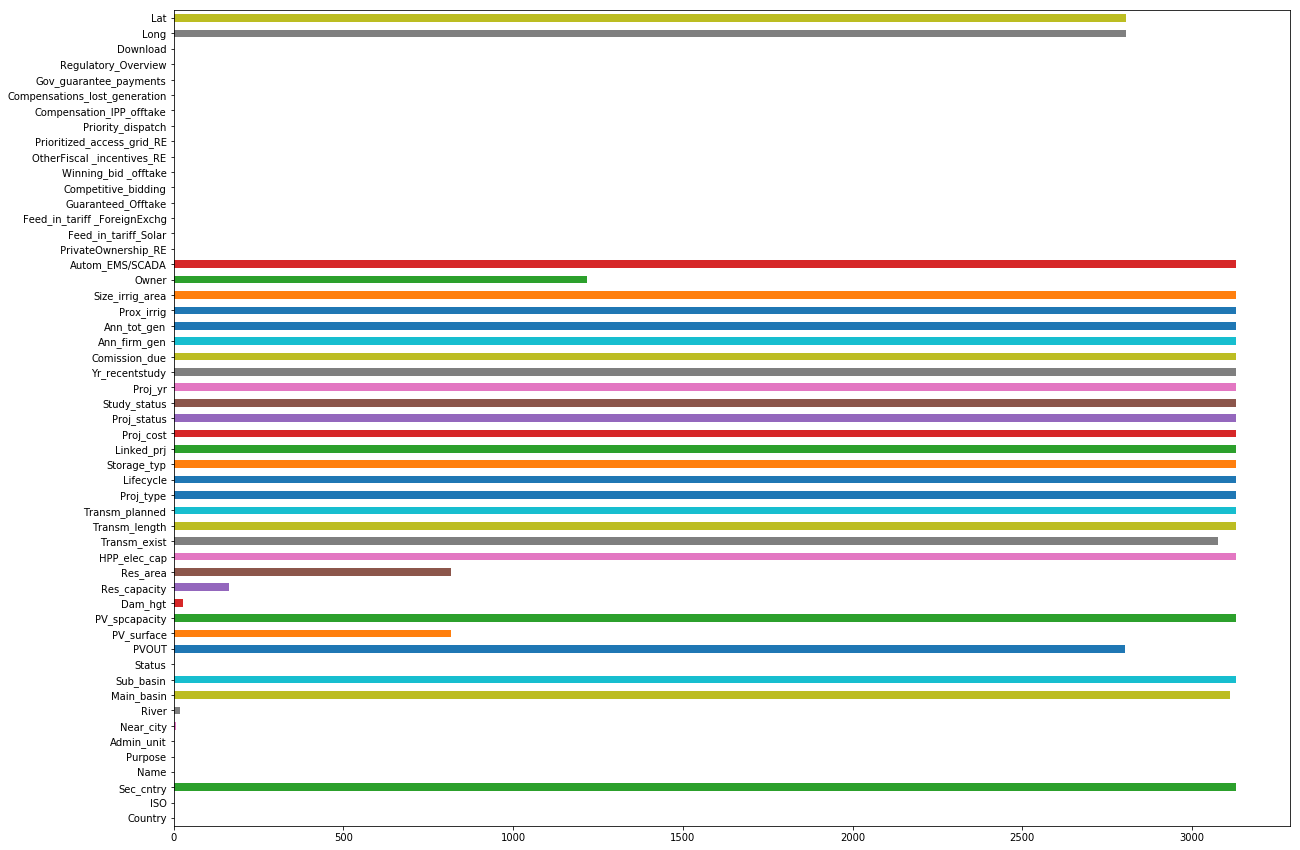

In [7]:
# Let's visualize null values
pd.isnull(data).sum().plot(kind = 'barh', figsize = (20, 15))

In [8]:
# There are so many columns in the dataset with null values, so we will remove columns having > 1000 null values.
cols = pd.isnull(data).sum() > 1000
data.drop(labels = cols[cols].index, axis = 1, inplace = True)

In [9]:
cols = pd.Series(data.columns)
cols

0                           Country
1                               ISO
2                              Name
3                           Purpose
4                        Admin_unit
5                         Near_city
6                             River
7                            Status
8                        PV_surface
9                           Dam_hgt
10                     Res_capacity
11                         Res_area
12              PrivateOwnership_RE
13             Feed_in_tariff_Solar
14     Feed_in_tariff _ForeignExchg
15               Guaranteed_Offtake
16              Competitive_bidding
17             Winning_bid _offtake
18       OtherFiscal _incentives_RE
19       Prioritized_access_grid_RE
20                Priority_dispatch
21         Compensation_IPP_offtake
22    Compensations_lost_generation
23           Gov_guarantee_payments
24              Regulatory_Overview
25                         Download
dtype: object

In [10]:
# We also remove columns from index 12 to 26 shown in above series, as we will not use them in analysis
data.drop(labels = cols[12:], axis = 1, inplace = True)

In [11]:
data.head(2)

,Country,ISO,Name,Purpose,Admin_unit,Near_city,River,Status,PV_surface,Dam_hgt,Res_capacity,Res_area
131,India,IND,Thonnur,Irrigation,Karnataka,Mysore,Thonnur Halla,Operational since 1000,31.20,24.38,12.46,3.120
132,India,IND,Cumbhum,Irrigation,Andhra Pradesh,Ongole,Gundlakamma,Operational since 1500,233.27,18.00,105.33,23.327


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3131 entries, 131 to 3261
Data columns (total 12 columns):
Country         3131 non-null object
ISO             3131 non-null object
Name            3131 non-null object
Purpose         3131 non-null object
Admin_unit      3129 non-null object
Near_city       3123 non-null object
River           3113 non-null object
Status          3131 non-null object
PV_surface      2313 non-null float64
Dam_hgt         3104 non-null float64
Res_capacity    2968 non-null float64
Res_area        2313 non-null float64
dtypes: float64(4), object(8)
memory usage: 318.0+ KB


In [13]:
pd.isnull(data).sum()

Country           0
ISO               0
Name              0
Purpose           0
Admin_unit        2
Near_city         8
River            18
Status            0
PV_surface      818
Dam_hgt          27
Res_capacity    163
Res_area        818
dtype: int64

In [14]:
data['Purpose'].value_counts()

Irrigation                2949
Irrigation, Hydropower      97
Hydropower                  85
Name: Purpose, dtype: int64

In [15]:
# Let's check value counts for above columns
data['Admin_unit'].value_counts()

Maharashtra                 1064
Madhya Pradesh               507
Gujarat                      426
Karnataka                    169
Rajasthan                    156
Chattisgarh                  142
Orissa                       123
Andhra Pradesh               120
Tamil Nadu                   100
Uttar Pradesh                 99
Jharkhand                     71
Kerala                        43
Bihar                         29
West Bengal                   19
Uttaranchal                   14
Punjab                        12
Jammu & Kashmir                7
Goa                            7
Himachal Pradesh               6
Meghalaya                      5
Madhya Prade                   3
Tripura                        1
Andhra Pradesh                 1
Assam                          1
Uttaranchal                    1
Sikkim                         1
U.T.:Andaman & Nicobar         1
Uttarakhand                    1
Name: Admin_unit, dtype: int64

In [16]:
data['Near_city'].value_counts()

N.A.               99
Sidhi              28
Shahdol            26
Dhar               24
Do                 21
Na                 21
Baikn'Pur          20
Mirzapur           19
Chittorgarh        18
Ambikapur          18
Hyderabad          16
Bhuj               16
Jath               16
Banswara           15
Kalwan             15
Shirpur            14
Dindori            14
Gondia             14
Dhule              14
Abdasa             14
Jhansi             14
Purulia            13
Sonbhadra          13
Sehore             13
Tik'Garh           13
Kannad             12
Chhindwara         12
Shajapur           12
Bhopal             11
Sakri              11
                   ..
Dindigul            1
Shirela             1
Maknakal            1
Dhrol               1
Madanpur Rampur     1
Perjang             1
Mapusa              1
Guntur              1
Gogha               1
Takali              1
Babhulgaon          1
Pavljetpur          1
Arjuni              1
Chalchodari         1
Chaksu    

In [17]:
# In Near_city column, there are 99 N.A. values. We replace them with null values
data['Near_city'].replace(to_replace = data['Near_city'].value_counts().index[0], value = np.nan, inplace = True)

In [18]:
data['River'].value_counts()

Local Nala       550
Local            509
Local Nalla       97
Kotar             46
Local Stream      43
N.A.              43
Na                23
Khari             12
Tapi               8
Krishna            8
N.A.               8
Tr. Of Banas       8
Vehla              7
Local Kotar        7
Berach             7
Banganga           7
Bori               6
Pennar             6
Krishna Bn.        6
Sileru             5
Suvamamukhi        5
Godavari Bn.       5
Nagzari            5
Local Wangha       5
Bhavani            5
Periyar            5
Shadol             5
Arkavathy          4
Fulzar             4
Bhadar             4
                ... 
Brahmni            1
Kinhariver         1
Masoli             1
Sinhan             1
Godavan            1
Wenna              1
Vali               1
Chulliyar          1
Local Drain        1
Kajali             1
Mahadevia          1
Dhorah             1
Baur               1
Bhagdeogoti        1
Karpara            1
Kankadajhar        1
Kharka Jore  

In [19]:
# In River column, there are values N.A. and Na. There are two N.A. categories, it means there might be space(s) at the end of, 
# one resulting in two categories of same name. Let's see.

data['River'].value_counts().index

Index(['Local Nala', 'Local', 'Local Nalla', 'Kotar', 'Local Stream', 'N.A.',
       'Na', 'Khari', 'Tapi', 'Krishna',
       ...
       'Kharkhai', 'Guhai', 'Jadal', 'Garh Nalla', 'Dondoha Nalla', 'Tiru',
       'Anckyampuzha', 'Vadi', 'Bagad', 'Padma'],
      dtype='object', length=1427)

In [20]:
# Replacing N.A. and Na values with null
data['River'].replace(to_replace = ['N.A.', 'Na', 'N.A. '], value = [np.nan, np.nan, np.nan], inplace = True)

In [21]:
data['Status'].value_counts()

Unknown                   436
Operational since 1983    109
Operational since 1978    108
Operational since 1980    101
Operational since 1986    101
Operational since 1975     93
Operational since 1985     93
Operational since 1981     90
Operational since 1976     89
Operational since 1979     85
Operational since 1977     81
Operational since 1984     80
Operational since 1974     79
Operational since 1982     79
Operational since 1987     72
Operational since 1973     70
Operational since 1988     68
Operational since 1965     53
Operational since 1990     51
Operational since 1989     48
Operational since 1991     46
Operational since 1972     45
Operational since 1992     44
Operational since 1968     40
Operational since 1970     40
Operational since 1971     40
Operational since 1966     39
Operational since 1962     38
Operational since 1958     35
Operational since 1967     35
                         ... 
Operational since 1500      1
Operational since 1886      1
Operationa

In [22]:
# Removing 'Operational since' and keeping <year> value in Status column.
data['Status'] = data['Status'].apply(lambda x : x.split()[2] if x.split()[0] == 'Operational' else x)

In [23]:
# Renaming columns
data.columns = ['Country', 'ISO', 'Dam Name', 'Dam Purpose', 'Admin Unit(State)', 'Nearest City', 'River', 
               'Operational Since Year', 'PhotoVoltic Surface[MW]', 'Dam Height (meters)',
               'Reservoir Capacity (million cubic meters)', 'Reservoir Area (square km)']

In [24]:
# Exporting Cleaned Data
data.to_csv('../../DataSets/West_Africa_And_India_Dams_2018/Cleaned_Data.csv', index = False)